# CLUSTERING CUSTOMER SEGMENTATION WITH K_MEANS

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import dataset

df3 = pd.read_csv('fix_clus.csv')
df3.head(10)

,customer_id,transaction_id,qty,total_amount
0,1.0,17,60,623300
1,2.0,13,57,392300
2,3.0,15,56,446200
3,4.0,10,46,302500
4,5.0,7,27,268600
5,6.0,10,44,459100
6,7.0,17,57,498800
7,8.0,14,47,542100
8,9.0,10,44,349200
9,11.0,7,28,247300


<AxesSubplot:xlabel='qty', ylabel='total_amount'>

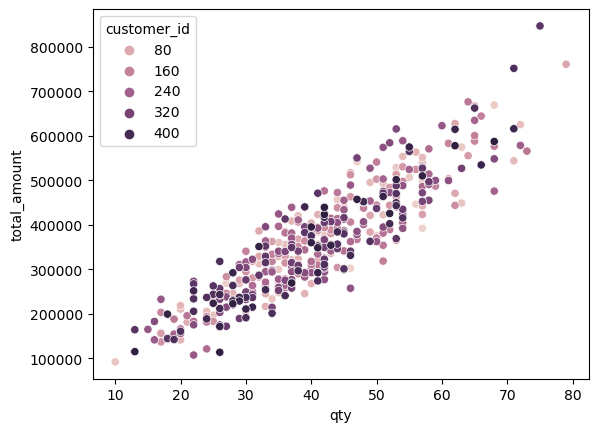

In [30]:
#sebelum clustering

sns.scatterplot(data = df3, x = 'qty', y = 'total_amount', hue = 'customer_id')

In [5]:
#standarisasi data total amount

from sklearn.preprocessing import StandardScaler
ta = ['transaction_id', 'qty', 'total_amount']
X = df3[ta].values

X_std = StandardScaler().fit_transform(X)
new_df = pd.DataFrame(data = X_std, columns = ta)
new_df.describe()


,transaction_id,qty,total_amount
count,4.440000e+02,4.440000e+02,4.440000e+02
mean,2.955594e-16,-1.834744e-16,9.001808e-18
std,1.001128e+00,1.001128e+00,1.001128e+00
min,-2.533632e+00,-2.425104e+00,-2.165759e+00
25%,-6.813828e-01,-6.941272e-01,-7.309120e-01
50%,-6.396655e-02,-6.468125e-02,-6.782503e-02
75%,5.534497e-01,7.221262e-01,6.276028e-01
max,3.023115e+00,3.003868e+00,3.897439e+00


# CLUSTERING

In [6]:
#aglomarative clustering 

from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 4)
ac.fit(new_df.values)

AgglomerativeClustering(n_clusters=4)

In [7]:
#menyimpan hasil clustering

df3['ac_labels'] = ac.labels_

<AxesSubplot:xlabel='qty', ylabel='total_amount'>

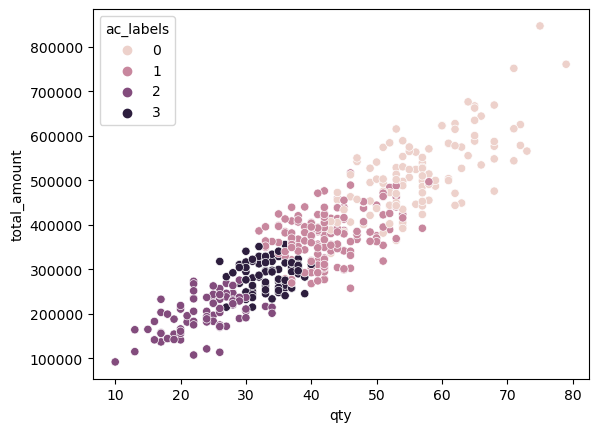

In [26]:
#analisis visualisasi cluster

sns.scatterplot(data = df3, x = 'qty', y = 'total_amount', hue = 'ac_labels')

In [8]:
#Agregasi 

df3.groupby('ac_labels').agg({'customer_id' : ['count'],
                       'transaction_id' : ['mean'],
                       'qty' : ['mean'],
                       'total_amount' : ['mean']})

,customer_id,transaction_id,qty,total_amount
,count,mean,mean,mean
ac_labels,,,,
0,115,15.382609,56.417391,515050.434783
1,162,11.283951,42.407407,372714.814815
2,83,6.951807,23.710843,200896.385542
3,84,9.547619,33.321429,289091.666667


# K-Means

In [36]:
kmeans = KMeans(n_clusters = 4, random_state = 10)
kmeans.fit(X_std)
df3['km_labels'] = kmeans.labels_

In [37]:
df3.head()

,customer_id,transaction_id,qty,total_amount,fit,ac_labels,km_labels
0,1.0,17,60,623300,0,0,2
1,2.0,13,57,392300,1,1,3
2,3.0,15,56,446200,0,0,3
3,4.0,10,46,302500,1,1,0
4,5.0,7,27,268600,2,2,1


<AxesSubplot:xlabel='qty', ylabel='total_amount'>

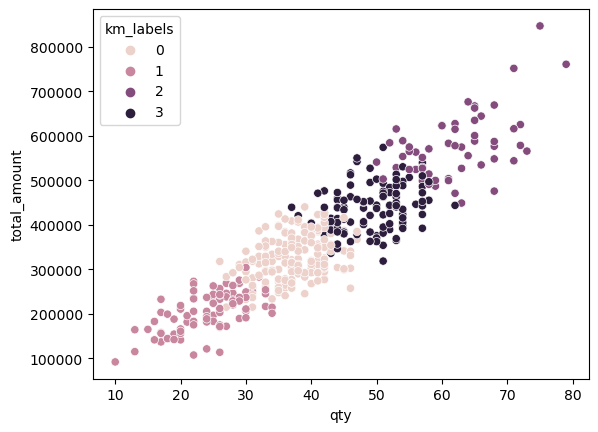

In [38]:
#analisis visualisasi 

sns.scatterplot(data = df3, x = 'qty', y = 'total_amount', hue = 'km_labels')

# Elbow Method

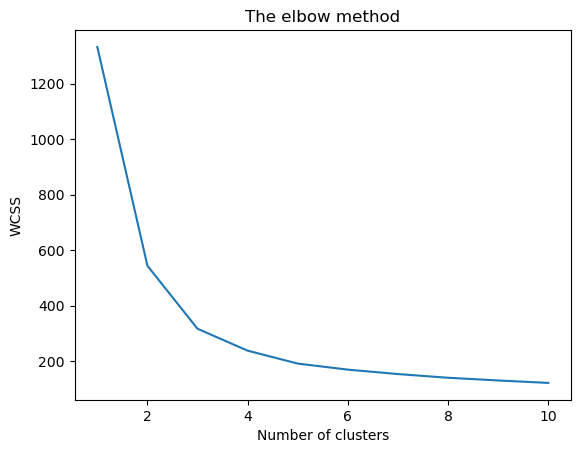

In [39]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_std)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [40]:
kmeans = KMeans(n_clusters = 3, random_state = 10)
kmeans.fit(X_std)
df3['km_labels'] = kmeans.labels_

<AxesSubplot:xlabel='qty', ylabel='total_amount'>

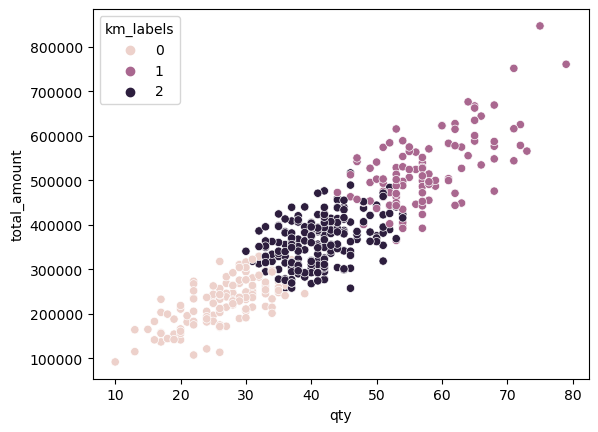

In [41]:
#analisis visualisasi 

sns.scatterplot(data = df3, x = 'qty', y = 'total_amount', hue = 'km_labels')

In [42]:
df3.groupby('km_labels').agg({'customer_id' : ['count'],
                       'transaction_id' : ['mean'],
                       'qty' : ['mean'],
                       'total_amount' : ['mean']})

,customer_id,transaction_id,qty,total_amount
,count,mean,mean,mean
km_labels,,,,
0,134,7.768657,26.865672,229173.880597
1,107,15.383178,57.654206,525431.775701
2,203,11.275862,41.162562,362749.753695
